# Handwritten digits classification using neural network


In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will then add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


1). X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.4, this means 60% of observations from your complete data will be used to train/fit the model and rest 40% will be used to test the model.

2). X_test - This is remaining 40% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

3). y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

4). y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

In [3]:
len(X_train)  # no of images that are used to train the model

60000

In [4]:
len(X_test) # no of labels that are used to train the models

10000

In [5]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

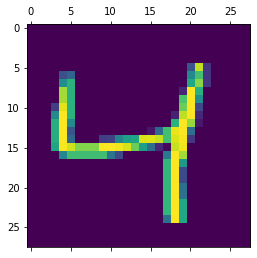

In [11]:
plt.matshow(X_train[2])

In [12]:
y_train[2]

4

In [13]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
X_train.shape

(60000, 28, 28)

In [22]:
# Here we perform scaling to improve the accuracy of the model
X_train = X_train / 255
X_test = X_test / 255

In [23]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [25]:
X_train_flattened.shape

(60000, 784)

In [26]:
X_test_flattened.shape

(10000, 784)

In [27]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# This is where the exact training happens
model.fit(X_train_flattened, y_train, epochs=5)

# Optimizer allows you to train effectively. Allows to reach to the global minimum in a effective way.
# Loss function: Out output here is categorical
# metrics: What you want to infer


Epoch 1/5
1875/1875 [==============================] - 2s 832us/step - loss: 0.4738 - accuracy: 0.8749
Epoch 2/5
1875/1875 [==============================] - 1s 719us/step - loss: 0.3043 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 1s 740us/step - loss: 0.2836 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 1s 712us/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 1s 704us/step - loss: 0.2664 - accuracy: 0.9256


In [29]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 505us/step - loss: 0.2712 - accuracy: 0.9229


[0.27121415734291077, 0.9229000210762024]

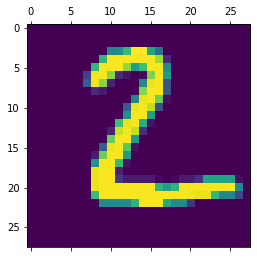

In [37]:
plt.matshow(X_test[1])

In [39]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([3.5350120e-01, 1.0523349e-02, 9.9911988e-01, 3.6188459e-01,
       1.6465359e-09, 8.3347970e-01, 9.0475321e-01, 1.4002308e-12,
       1.3764042e-01, 2.7491629e-09], dtype=float32)

np.argmax finds a maximum element from an array and returns the index of it

In [38]:
np.argmax(y_predicted[1])

2

In [40]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [41]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [42]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [43]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    1,    1,    5,    8,    4,    3,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,   14,  909,   16,   14,    3,   12,   12,   44,    2],
       [   4,    1,   18,  917,    4,   20,    2,   12,   23,    9],
       [   1,    1,    3,    1,  942,    0,    9,    3,    6,   16],
       [   7,    3,    2,   35,   16,  767,   18,    9,   31,    4],
       [   9,    3,    5,    1,    8,    9,  919,    2,    2,    0],
       [   1,    7,   19,    5,   10,    0,    0,  960,    3,   23],
       [   7,   11,    5,   20,   10,   22,   10,   14,  870,    5],
       [  11,    7,    1,    8,   68,    6,    0,   32,    6,  870]])>

Text(69.0, 0.5, 'Truth')

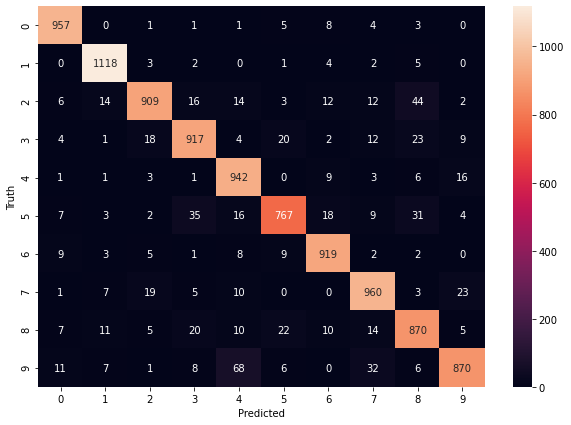

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [45]:
# no of neurons = 100 (Trail and error method - decide)
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 998us/step - loss: 0.2662 - accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 2s 954us/step - loss: 0.1194 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 2s 988us/step - loss: 0.0828 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 2s 981us/step - loss: 0.0639 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 2s 969us/step - loss: 0.0487 - accuracy: 0.9852


In [46]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 739us/step - loss: 0.0761 - accuracy: 0.9766


[0.07606708258390427, 0.9765999913215637]

Text(69.0, 0.5, 'Truth')

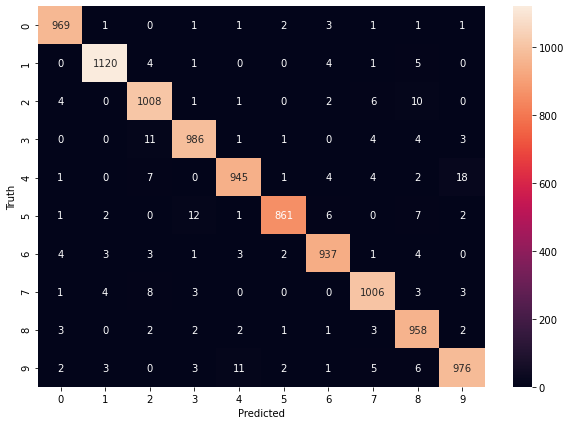

In [47]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2781 - accuracy: 0.9208
Epoch 2/10
1875/1875 [==============================] - 2s 959us/step - loss: 0.1311 - accuracy: 0.9611
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0919 - accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0691 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.0554 - accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 2s 995us/step - loss: 0.0446 - accuracy: 0.9861
Epoch 7/10
1875/1875 [==============================] - 2s 973us/step - loss: 0.0365 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 2s 974us/step - loss: 0.0297 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 2s 993us/step - loss: 0.0250 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step -

In [49]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9766


[0.08811308443546295, 0.9765999913215637]